## Imports

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Data acquisition

In [3]:
results = pd.read_csv('results.csv')

## Plot

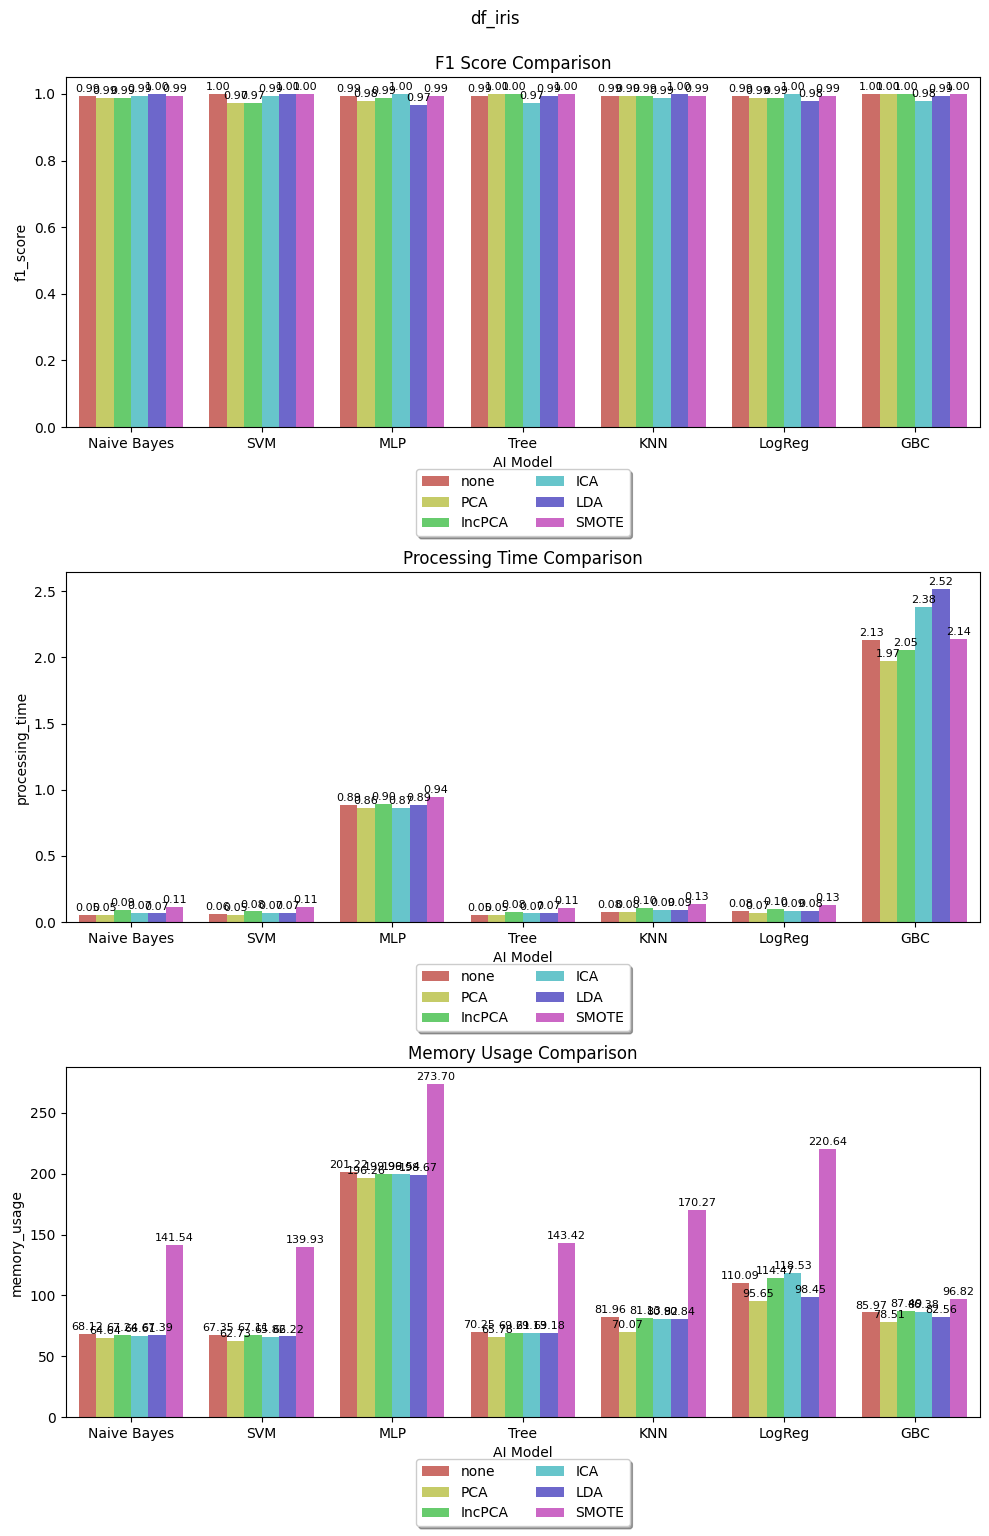

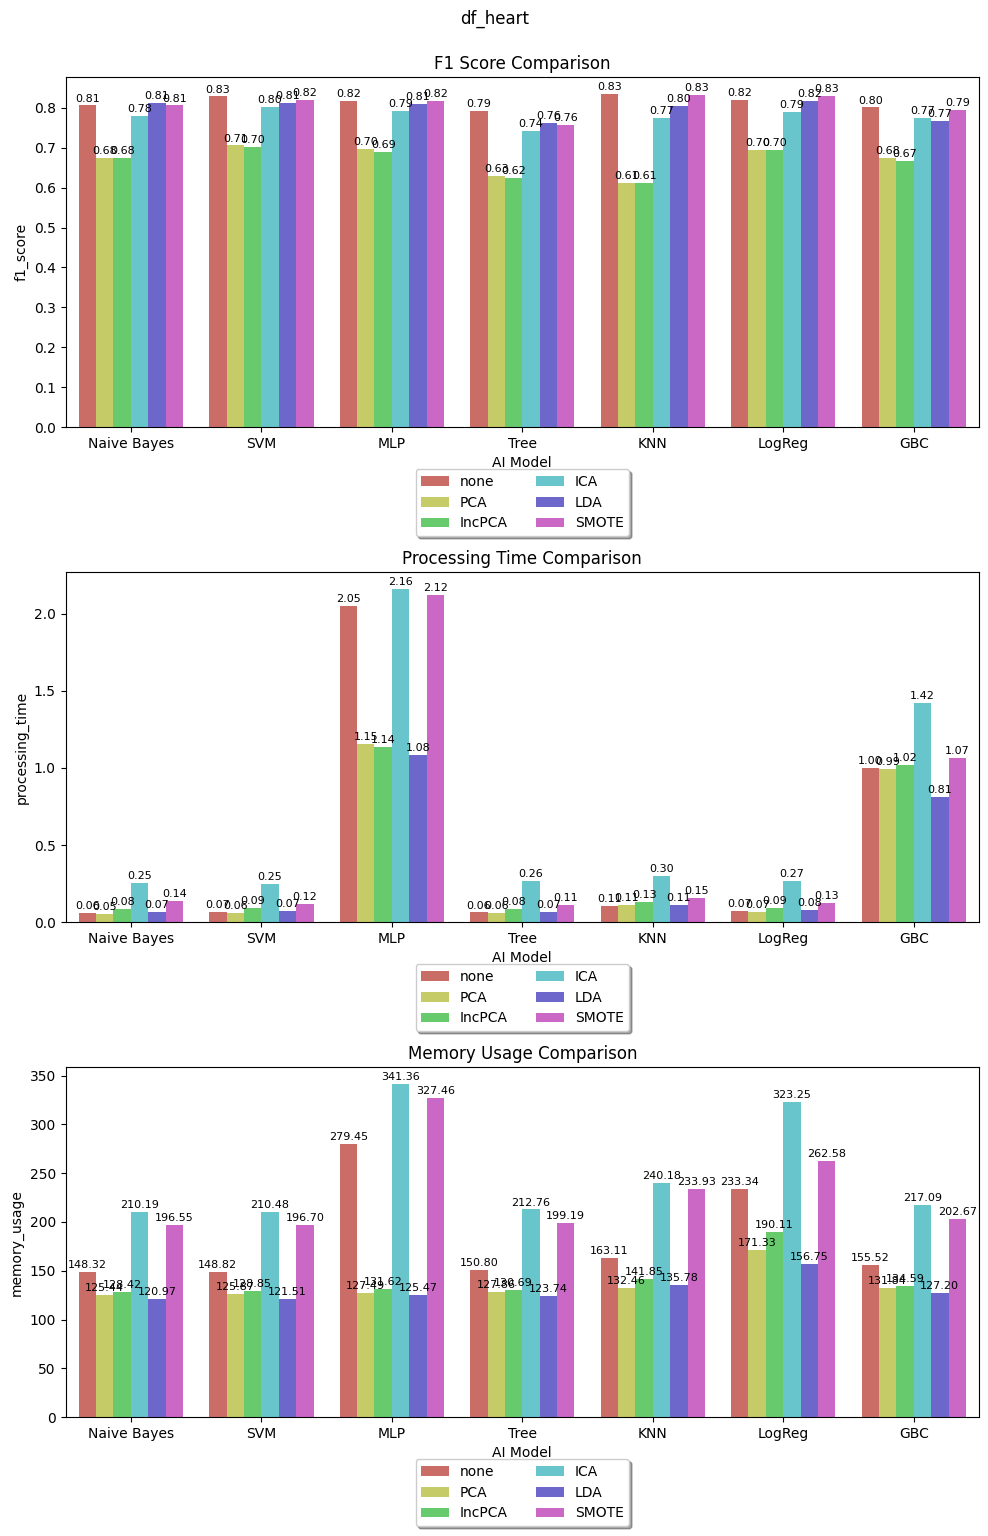

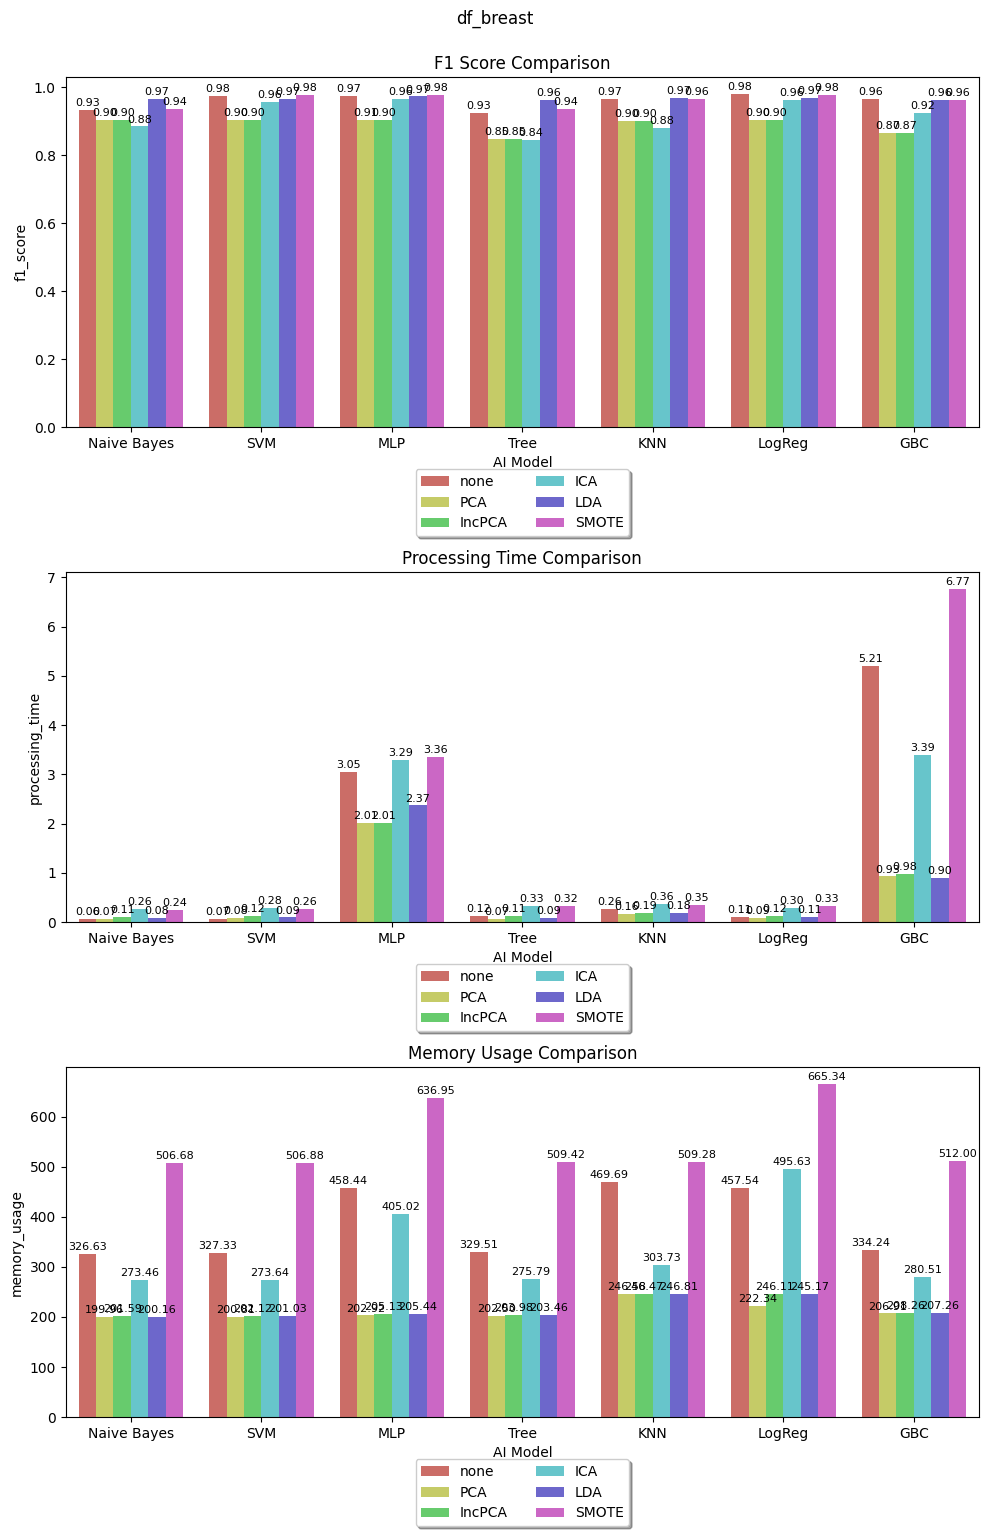

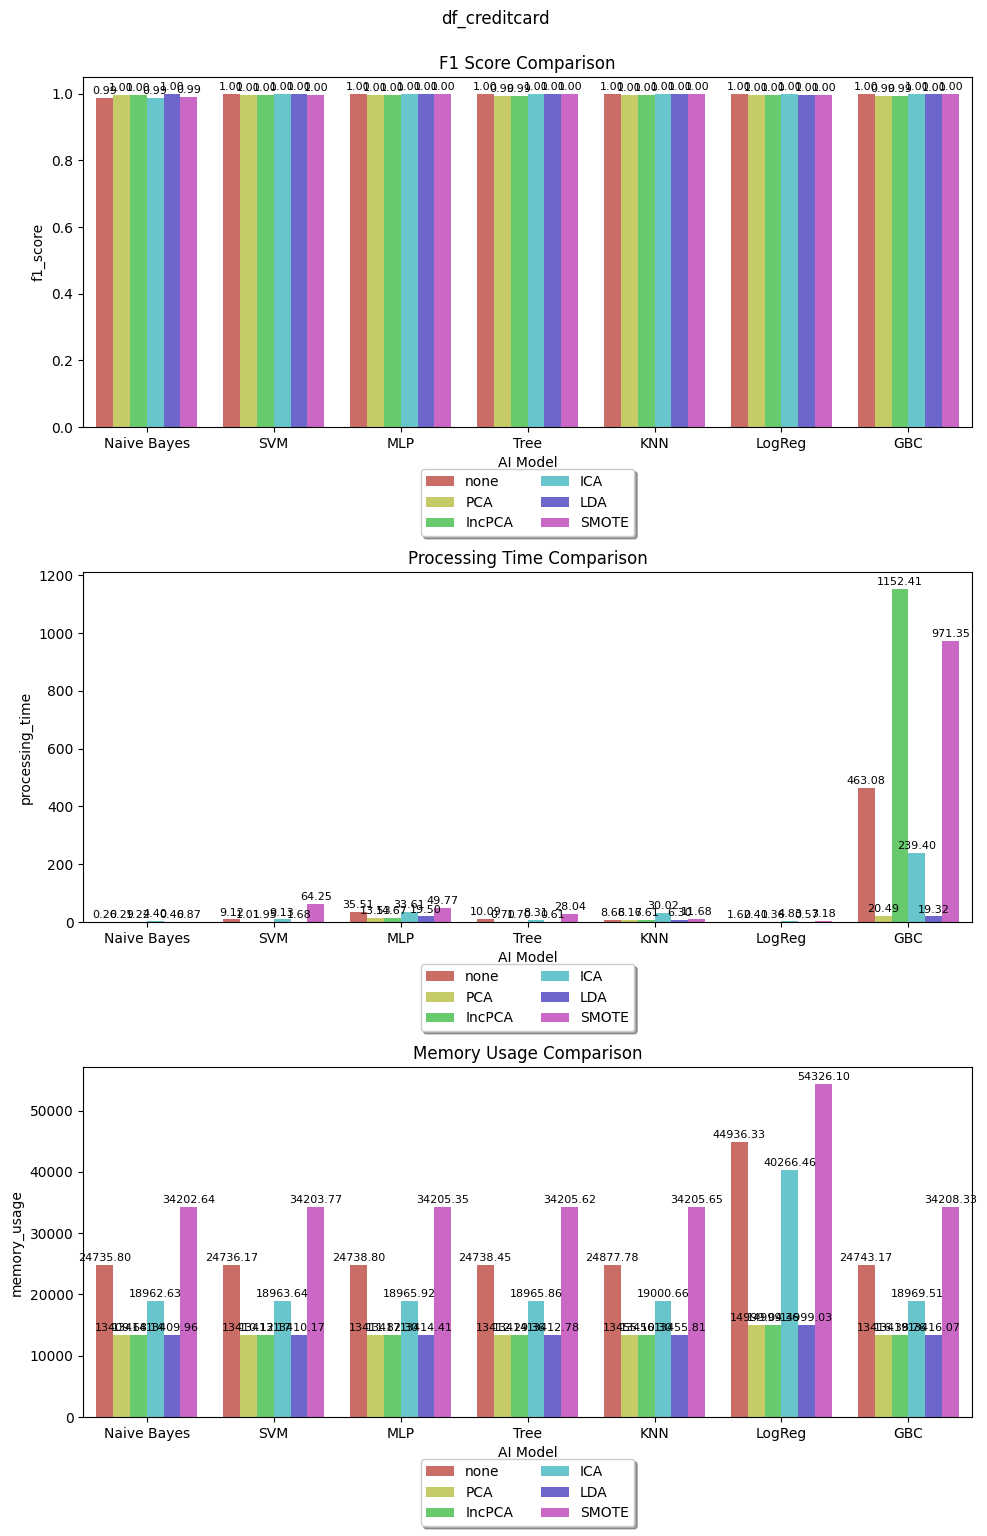

In [4]:
datasets = results['dataset'].unique()

for dataset in datasets:
    dataset_df = results[results['dataset'] == dataset]
    metrics = ["f1_score", "processing_time", "memory_usage"]
    titles = ["F1 Score Comparison", "Processing Time Comparison", "Memory Usage Comparison"]

    fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 5 * len(metrics)))

    sns.set_palette("hls")

    for i, metric in enumerate(metrics):
        ax = sns.barplot(data=dataset_df, x="model", y=metric, hue="technique", errorbar=None, ax=axes[i])
        axes[i].set_xlabel("AI Model")
        axes[i].set_ylabel(metric)
        axes[i].set_title(titles[i])

        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2)

        for p in ax.patches:
            height = p.get_height() if not pd.isnull(p.get_height()) else 0
            if height != 0:  # Add annotation only if the bar height is not zero
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                            ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                            textcoords='offset points')

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.suptitle(f'{dataset}', y=1.02)
    plt.show()